# Introdução

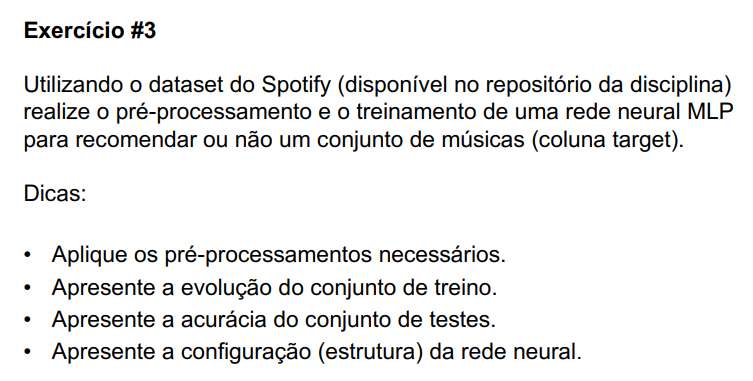

# Bicliotecas e Funções

In [24]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [25]:
import random

# Define a semente com o valor 42
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [26]:
pd.options.display.float_format = '{:.2f}'.format

# Código

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/deep%20learning%20I/spotfy/DadosSpotify.csv')
df.drop(columns=['id'], inplace=True)
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01,0.83,204600,0.43,0.02,2,0.17,-8.79,1,0.43,150.06,4.00,0.29,1,Mask Off,Future
1,0.20,0.74,326933,0.36,0.01,1,0.14,-10.40,1,0.08,160.08,4.00,0.59,1,Redbone,Childish Gambino
2,0.03,0.84,185707,0.41,0.00,2,0.16,-7.15,1,0.29,75.04,4.00,0.17,1,Xanny Family,Future
3,0.60,0.49,199413,0.34,0.51,5,0.09,-15.24,1,0.03,86.47,4.00,0.23,1,Master Of None,Beach House
4,0.18,0.68,392893,0.56,0.51,5,0.44,-11.65,0,0.07,174.00,4.00,0.90,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00,0.58,274404,0.93,0.00,1,0.13,-3.50,1,0.33,74.98,4.00,0.21,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.09,0.89,182182,0.89,0.00,1,0.05,-2.66,1,0.13,110.04,4.00,0.87,0,Candy,Dillon Francis
2014,0.01,0.64,207200,0.94,0.00,0,0.21,-2.47,1,0.11,150.08,4.00,0.47,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00,0.56,185600,0.99,0.68,1,0.09,-2.73,1,0.13,150.01,4.00,0.62,0,First Contact,Twin Moons


In [28]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00
mean,0.19,0.62,246306.20,0.68,0.13,5.34,0.19,-7.09,0.61,0.09,121.60,3.97,0.50,0.51
std,0.26,0.16,81981.81,0.21,0.27,3.65,0.16,3.76,0.49,0.09,26.69,0.26,0.25,0.50
min,0.00,0.12,16042.00,0.01,0.00,0.00,0.02,-33.10,0.00,0.02,47.86,1.00,0.03,0.00
25%,0.01,0.51,200015.00,0.56,0.00,2.00,0.09,-8.39,0.00,0.04,100.19,4.00,0.29,0.00
50%,0.06,0.63,229261.00,0.71,0.00,6.00,0.13,-6.25,1.00,0.05,121.43,4.00,0.49,1.00
75%,0.27,0.74,270333.00,0.85,0.05,9.00,0.25,-4.75,1.00,0.11,137.85,4.00,0.69,1.00
max,0.99,0.98,1004627.00,1.00,0.98,11.00,0.97,-0.31,1.00,0.82,219.33,5.00,0.99,1.00


In [29]:
1004627.00/1000/60 # 16.743783333333333
# a música mais longa tem quase 17min, talvez sejá um outlier indesejável

16.743783333333333

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

## Correlação

C:\Users\KValim\AppData\Local\Temp\ipykernel_16792\2893186402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\KValim\AppData\Local\Temp\ipykernel_16792\2893186402.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


[Text(0.5, 0, 'acousticness'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'duration_ms'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'key'),
 Text(6.5, 0, 'liveness'),
 Text(7.5, 0, 'loudness'),
 Text(8.5, 0, 'mode'),
 Text(9.5, 0, 'speechiness'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature'),
 Text(12.5, 0, 'valence'),
 Text(13.5, 0, 'target')]

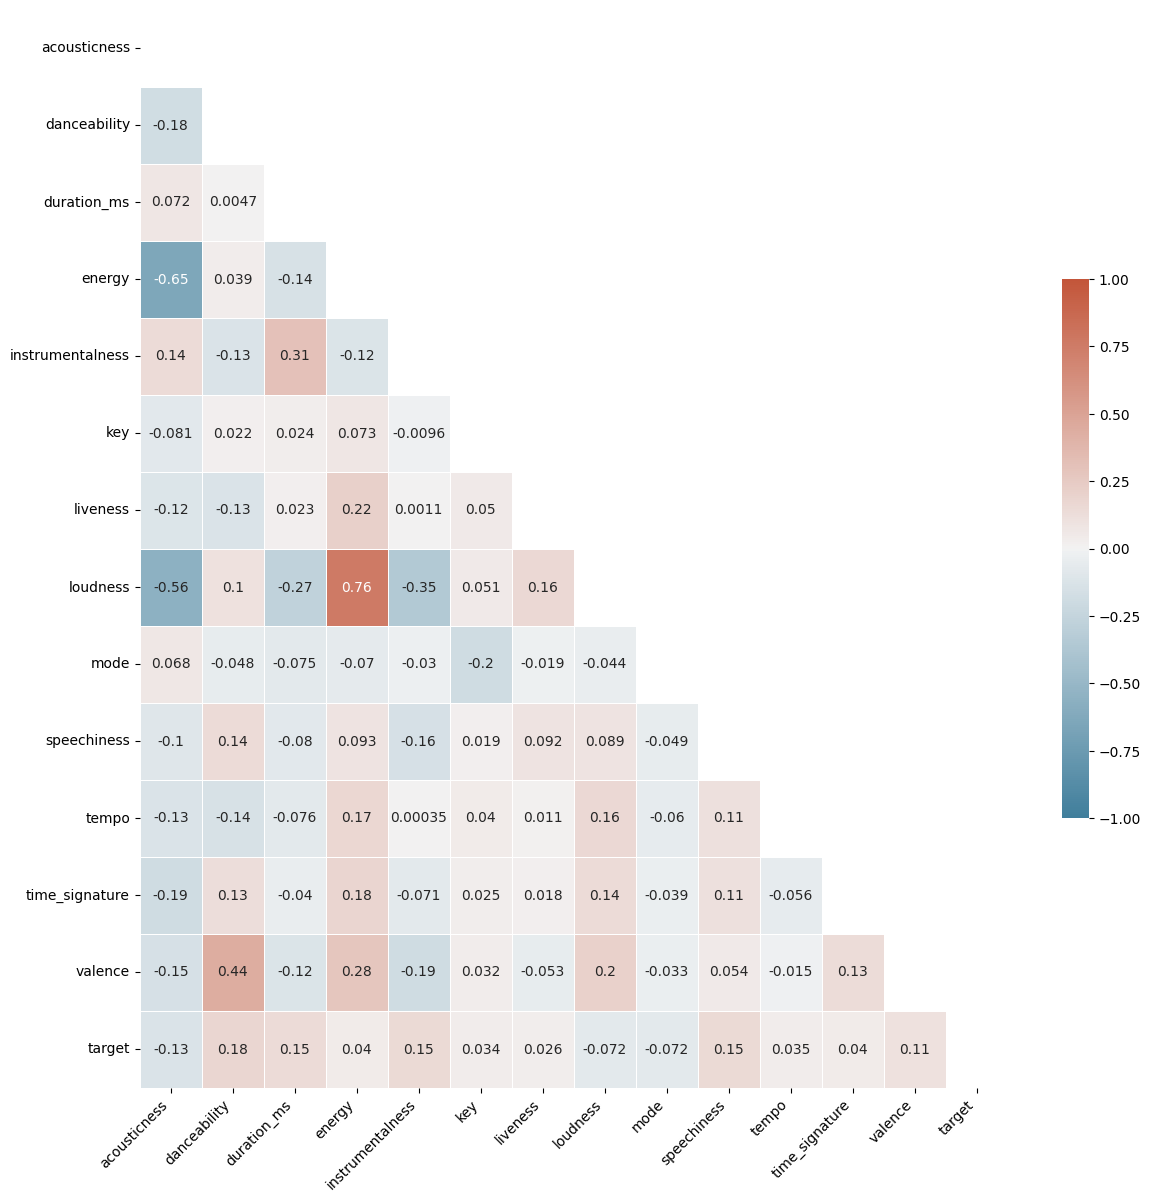

In [31]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (14, 14))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Sem nenhuma variável com alta correlçação com a target!

Entretanto loudness tem grande correlação positiva com energy, e média correlação negaiva com acousticness, possibilitando algum enviezamento. Talvez sejá vantajoso retirar a variável loudness do modelo.

## Plots

In [32]:
continous_features = list(set(df.columns) - set(['target']) - set(['artist']) - set(['song_title']))
continous_features

['instrumentalness',
 'duration_ms',
 'key',
 'danceability',
 'tempo',
 'mode',
 'acousticness',
 'liveness',
 'speechiness',
 'time_signature',
 'valence',
 'energy',
 'loudness']

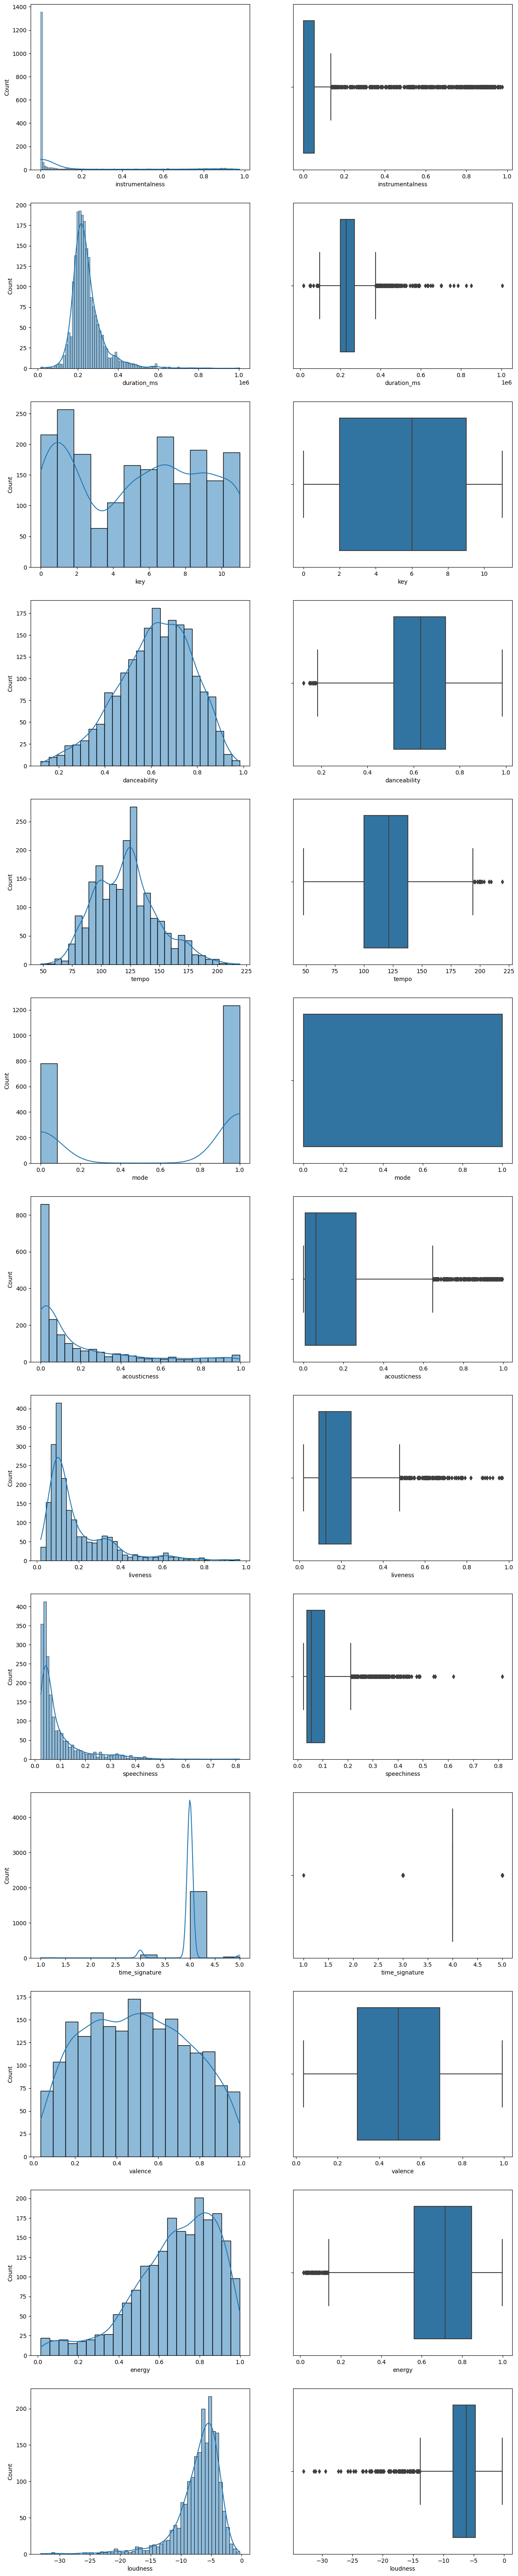

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [33]:
fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(15, 80))
for i in range(len(continous_features)):
    feature = continous_features[i]
    plt.figure(figsize = (5, 5))
    data=df.copy()
    
    sns.histplot(x=data[feature], ax=axes[i][0], kde=True)
    sns.boxplot(x=data[feature], ax=axes[i][1])

Os gráficos boxplot demonstram que existem uma grande quantidade de outliers, que talvez diminua a saúde do dataset para o treinamento.

## Split Train Test

In [34]:
df = df.drop(columns=['artist','song_title'])

In [35]:
# separa do dados em features e target
X = df.drop("target", axis=1)
y = df["target"]


In [36]:
# separa os dados de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Em seguida, padronizaremos os dados, mudando a escala através do StandardScaler

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
epochs = 100

## Modelo 1

In [39]:
# modelo
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                448       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [41]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

# add callbacks
earlystopper = EarlyStopping(patience=10)

callbacks = [earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
26/26 [==============================] - 2s 19ms/step - loss: 0.6792 - accuracy: 0.5542 - val_loss: 0.6477 - val_accuracy: 0.6287
Epoch 2/100
26/26 [==============================] - 0s 9ms/step - loss: 0.6354 - accuracy: 0.6373 - val_loss: 0.6265 - val_accuracy: 0.6708
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6113 - accuracy: 0.6683 - val_loss: 0.6089 - val_accuracy: 0.6881
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5926 - accuracy: 0.6857 - val_loss: 0.5992 - val_accuracy: 0.6955
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5811 - accuracy: 0.6919 - val_loss: 0.5927 - val_accuracy: 0.7005
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5721 - accuracy: 0.7024 - val_loss: 0.5882 - val_accuracy: 0.7104
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5641 - accuracy: 0.7074 - val_loss: 0.5839 - val_accuracy: 0.7104
Epoch 8/100


In [43]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       206
           1       0.72      0.74      0.73       198

    accuracy                           0.73       404
   macro avg       0.73      0.73      0.73       404
weighted avg       0.73      0.73      0.73       404



## Conclusão parcial

O modelo obteve uma acurária de **73,27% de acurácia** sobre os dados de validação.

Mas como são muitas combinações possíveis na construção da arquitetura do modelo, a seguir vou utilizar o método de GridSearch para acha um modelo ótimo.

### GridSearchCV

GridSearchCV to search for the best neural network architecture and hyperparameters for your dataset:

In [44]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

# define the model
def create_model(num_layers=1, num_units=32, activation='relu', lr=0.01):
    model = Sequential()
    for _ in range(num_layers):
        model.add(Dense(num_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# create the wrapper
model_wrapper = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=0)

# define the grid search parameters
params = {'num_layers': [1, 2, 3],
          'num_units': [16, 32, 64],
          'activation': ['relu', 'tanh', 'sigmoid'],
          'lr': [0.0001, 0.001, 0.01]}

# create the grid search
grid = GridSearchCV(estimator=model_wrapper, param_grid=params, cv=5, n_jobs=-1, error_score='raise')

earlystopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [earlystopper]

# fit the grid search
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks)

# summarize the results
print(f'Melhor Score: {grid_result.best_score_}\nParametros: {grid_result.best_params_}')

C:\Users\KValim\AppData\Local\Temp\ipykernel_16792\1972115852.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=0)


Melhor Score: 0.7464285731315613
Parametros: {'activation': 'tanh', 'lr': 0.01, 'num_layers': 1, 'num_units': 16}


# Conclusão (mudar)

O resultado do grid search foi um pouco superior (**74,65%**) ao modelo construido a mão (**73,27%**).